In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import plot_confusion_matrix
import pickle

In [2]:
data=pd.read_csv('mushrooms.csv')

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
#To check the target whether edible or poisonous
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
#checking for nulls
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
#To check for the values each  column using for loop

for col in data.columns: 
    print(data[col].value_counts())

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [10]:
#Reassign all binary columns to 0 or 1
data['bruises']=np.where(data['bruises']=='t',1,data['bruises'])
data['bruises']=np.where(data['bruises']=='f',0,data['bruises'])

In [11]:
data['bruises'].value_counts()

0    4748
1    3376
Name: bruises, dtype: int64

In [12]:
data['gill-attachment']=np.where(data['gill-attachment']=='f',0,data['gill-attachment'])
data['gill-attachment']=np.where(data['gill-attachment']=='a',1,data['gill-attachment'])

In [13]:
data['gill-spacing']=np.where(data['gill-spacing']=='c',0,data['gill-spacing'])
data['gill-spacing']=np.where(data['gill-spacing']=='w',1,data['gill-spacing'])

In [14]:
data['gill-size']=np.where(data['gill-size']=='b',0,data['gill-size'])
data['gill-size']=np.where(data['gill-size']=='n',1,data['gill-size'])

In [15]:
data['stalk-shape']=np.where(data['stalk-shape']=='e',0,data['stalk-shape'])
data['stalk-shape']=np.where(data['stalk-shape']=='t',1,data['stalk-shape'])

In [16]:
#assign missing values in stalk-root to 'other'
data['stalk-root']=np.where(data['stalk-root']=='?','other',data['stalk-root'])

In [17]:
#dropping veil-type column since values are all the same
#no use in the model
data.drop(columns='veil-type',inplace=True)

In [18]:
#re-assign to actual ring number, 0, 1, 2 -> numerical data
data['ring-number']=np.where(data['ring-number']=='n',0,data['ring-number'])
data['ring-number']=np.where(data['ring-number']=='o',1,data['ring-number'])
data['ring-number']=np.where(data['ring-number']=='t',2,data['ring-number'])

In [19]:
data.shape

(8124, 22)

In [20]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,0,n,0,0,0,b,...,s,s,w,w,w,1,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


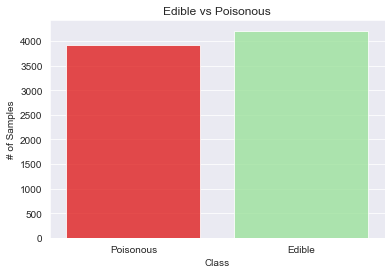

In [22]:
#target variable countplot

sns.set_style('darkgrid')
plt.figure()
fig1=sns.countplot(data['class'], alpha =.80, palette= ['red','lightgreen'])
plt.title('Edible vs Poisonous')
plt.ylabel('# of Samples')
plt.xlabel('Class')
fig1.set(xticklabels=['Poisonous','Edible'])
plt.show()

In [23]:
#To figure out features 
features=data.drop(columns='class')

<ipython-input-24-dce84c3a5258>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


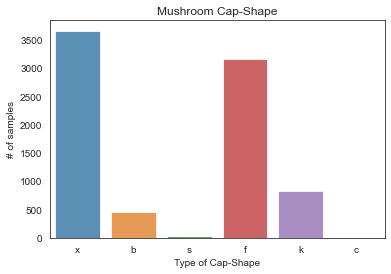

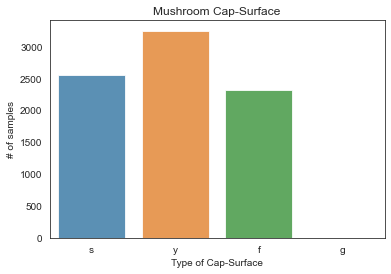

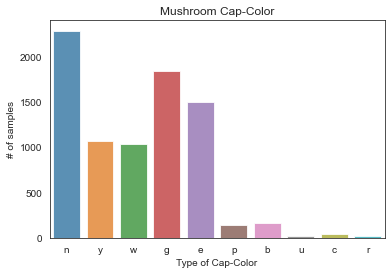

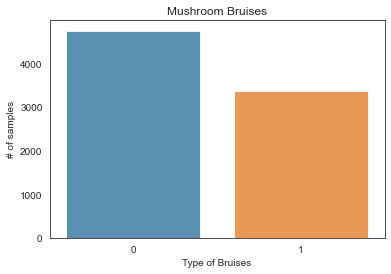

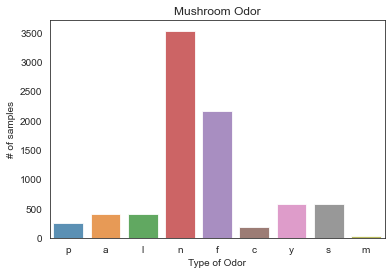

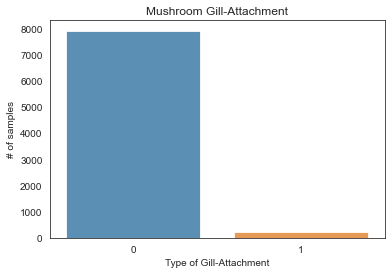

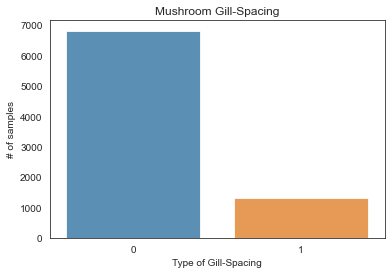

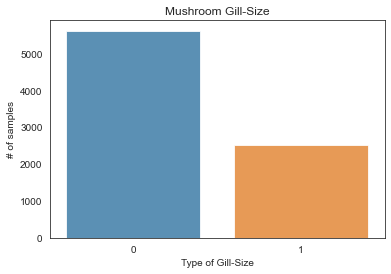

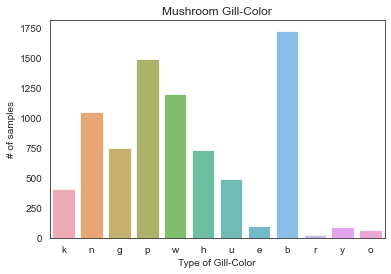

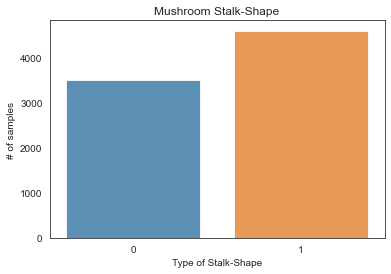

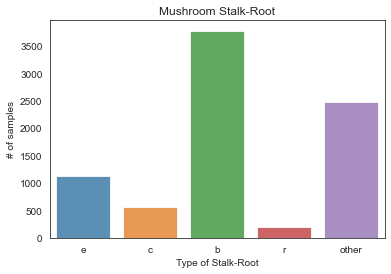

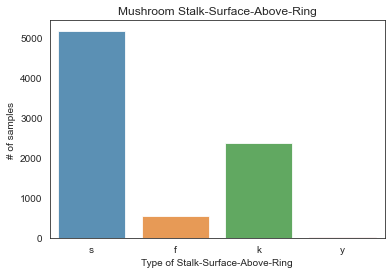

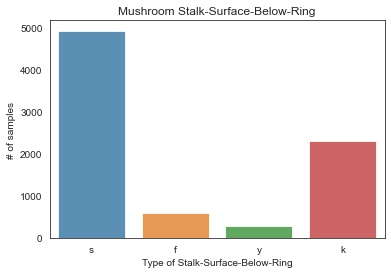

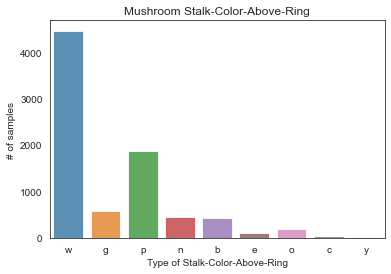

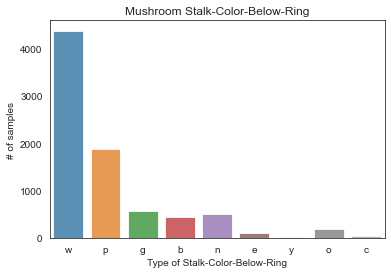

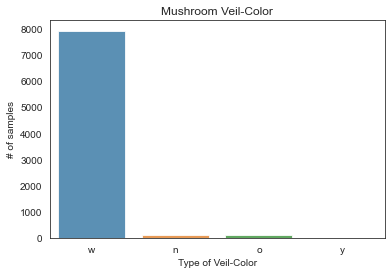

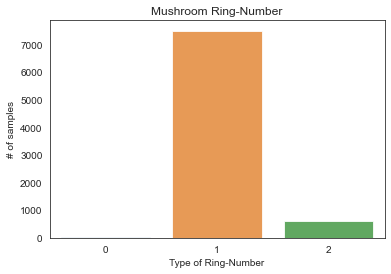

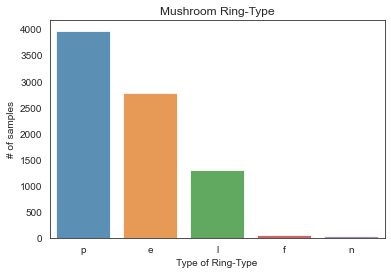

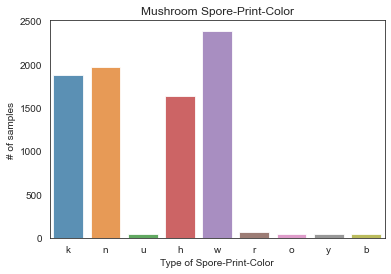

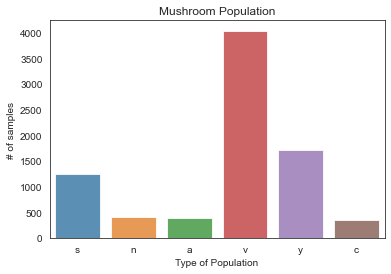

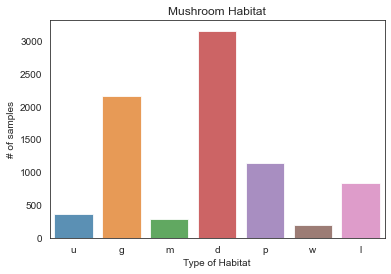

In [24]:
#barplots for each feature

for col in features.columns:
    sns.set_style('white')
    plt.figure()
    sns.countplot(features[col],alpha =.80)
    plt.ylabel('# of samples')
    plt.title('Mushroom' + ' ' + col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    

plt.show()

<ipython-input-25-851835dc7b6f>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots()


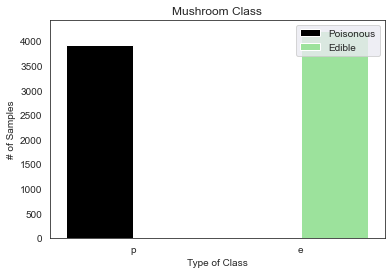

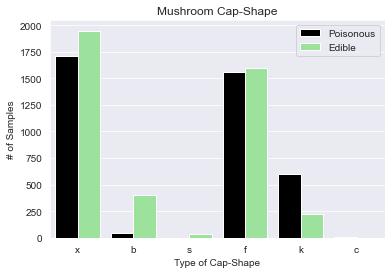

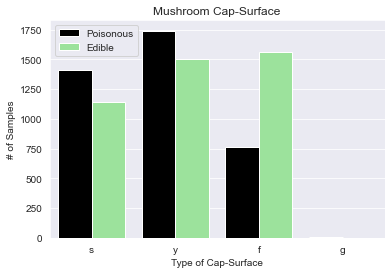

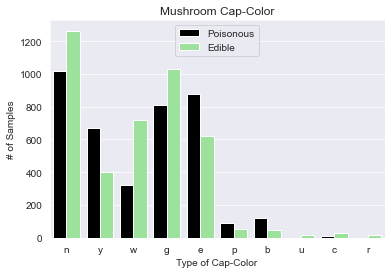

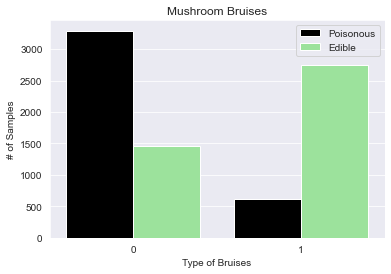

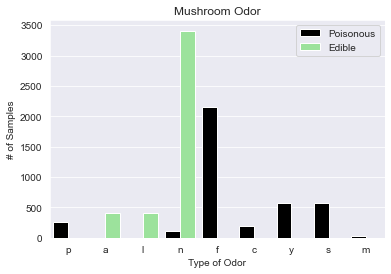

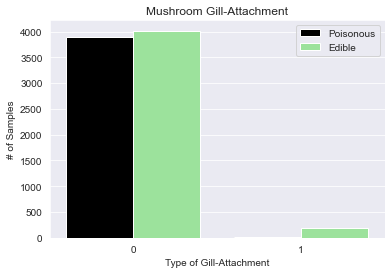

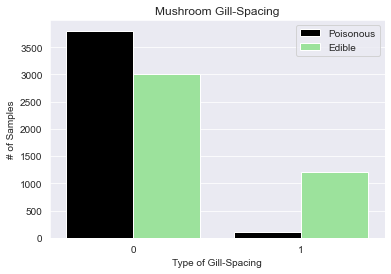

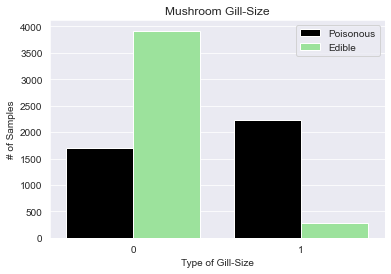

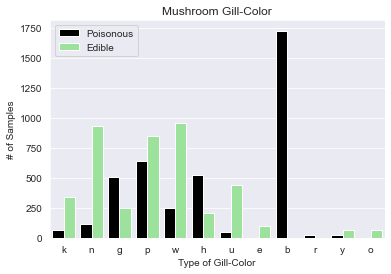

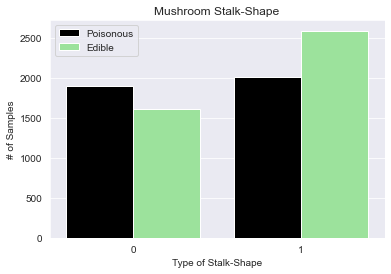

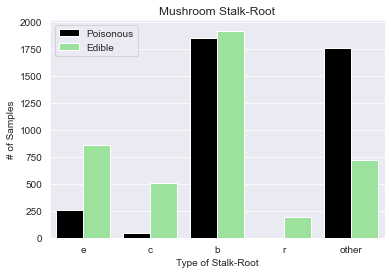

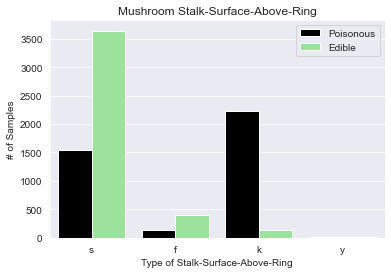

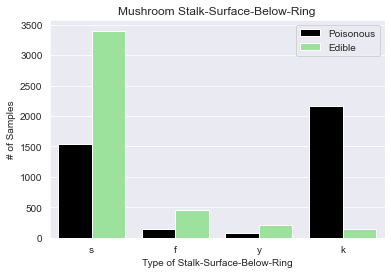

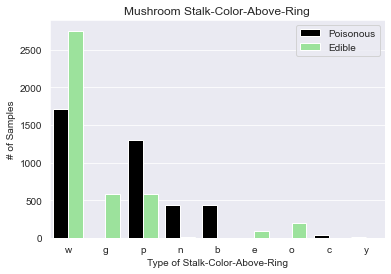

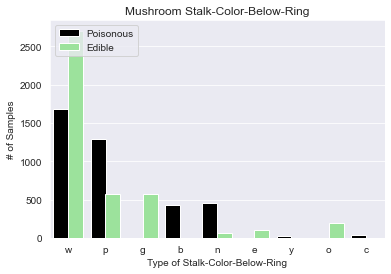

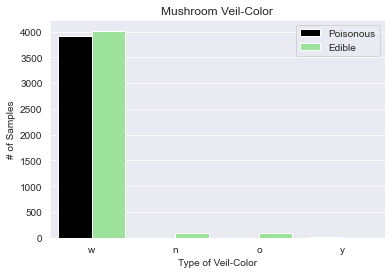

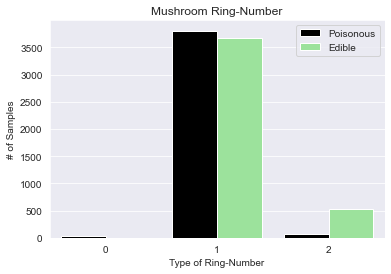

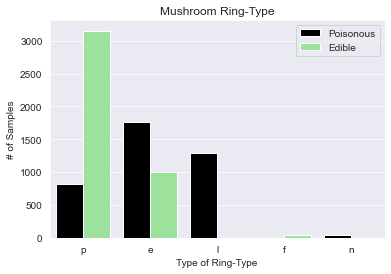

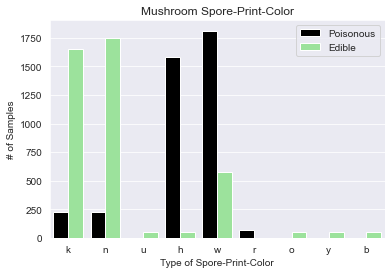

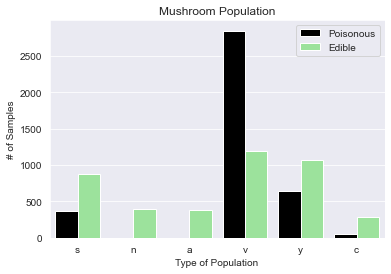

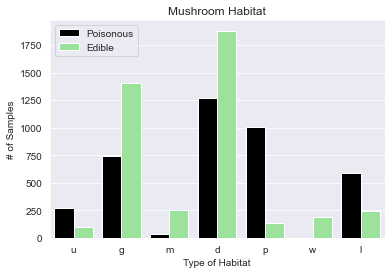

In [25]:
#barplots for each feature/stacked with class

for col in data:
    fig,ax = plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(col,hue=data['class'],palette=['black','lightgreen'],data=data)
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + col.title())
    plt.title('Mushroom' + ' ' + col.title())
    plt.legend(title=None,labels=['Poisonous','Edible'])

In [26]:
#pickling data before one-hot encoding
import pickle
data.to_pickle('EDAdata.pkl')

In [27]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,1,p,0,0,1,k,...,s,s,w,w,w,1,p,k,s,u
1,e,x,s,y,1,a,0,0,0,k,...,s,s,w,w,w,1,p,n,n,g
2,e,b,s,w,1,l,0,0,0,n,...,s,s,w,w,w,1,p,n,n,m
3,p,x,y,w,1,p,0,0,1,n,...,s,s,w,w,w,1,p,k,s,u
4,e,x,s,g,0,n,0,1,0,k,...,s,s,w,w,w,1,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,0,n,1,0,0,y,...,s,s,o,o,o,1,p,b,c,l
8120,e,x,s,n,0,n,1,0,0,y,...,s,s,o,o,n,1,p,b,v,l
8121,e,f,s,n,0,n,1,0,0,n,...,s,s,o,o,o,1,p,b,c,l
8122,p,k,y,n,0,y,0,0,1,b,...,s,k,w,w,w,1,e,w,v,l


In [28]:
df=pd.DataFrame(data)

In [29]:
df['class']=np.where(df['class']=='e',0,1)

In [30]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,1,p,0,0,1,k,...,s,s,w,w,w,1,p,k,s,u
1,0,x,s,y,1,a,0,0,0,k,...,s,s,w,w,w,1,p,n,n,g
2,0,b,s,w,1,l,0,0,0,n,...,s,s,w,w,w,1,p,n,n,m
3,1,x,y,w,1,p,0,0,1,n,...,s,s,w,w,w,1,p,k,s,u
4,0,x,s,g,0,n,0,1,0,k,...,s,s,w,w,w,1,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,0,n,1,0,0,y,...,s,s,o,o,o,1,p,b,c,l
8120,0,x,s,n,0,n,1,0,0,y,...,s,s,o,o,n,1,p,b,v,l
8121,0,f,s,n,0,n,1,0,0,n,...,s,s,o,o,o,1,p,b,c,l
8122,1,k,y,n,0,y,0,0,1,b,...,s,k,w,w,w,1,e,w,v,l


In [31]:

y=df['class']
x=df.drop(['class','bruises','gill-attachment','gill-spacing','gill-size','stalk-shape','ring-number'],axis=1)

In [34]:
df3=pd.get_dummies(x,drop_first=True)
#creating dummies for all features that are not binary or ordinal/numeric

In [35]:
df3.shape

(8124, 88)

In [36]:
df3

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [37]:
df_final=pd.concat([df,df3],axis=1)

In [38]:
df_final

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,x,s,n,1,p,0,0,1,k,...,0,1,0,0,0,0,0,0,1,0
1,0,x,s,y,1,a,0,0,0,k,...,1,0,0,0,1,0,0,0,0,0
2,0,b,s,w,1,l,0,0,0,n,...,1,0,0,0,0,0,1,0,0,0
3,1,x,y,w,1,p,0,0,1,n,...,0,1,0,0,0,0,0,0,1,0
4,0,x,s,g,0,n,0,1,0,k,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,0,n,1,0,0,y,...,0,0,0,0,0,1,0,0,0,0
8120,0,x,s,n,0,n,1,0,0,y,...,0,0,1,0,0,1,0,0,0,0
8121,0,f,s,n,0,n,1,0,0,n,...,0,0,0,0,0,1,0,0,0,0
8122,1,k,y,n,0,y,0,0,1,b,...,0,0,1,0,0,1,0,0,0,0


In [39]:
df_final.drop(columns=['cap-shape','cap-surface','cap-color','odor','gill-color','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-type','spore-print-color','population','habitat'],inplace=True)

In [40]:
df_final

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,1,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [41]:
#To find correlation
corr=df_final.corr()
corr[abs(corr>.50)]

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
class,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_c,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_f,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_k,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cap-shape_s,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
habitat_m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
habitat_p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
habitat_u,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


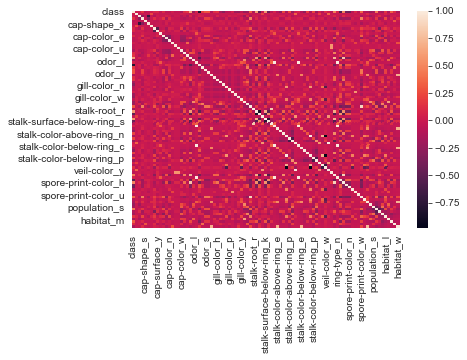

In [42]:
sns.heatmap(corr)

In [44]:
#final processed data for modeling
df_final.to_csv('final_mushroom_data.csv')


In [46]:
#Reading the clean data 

df=pd.read_csv('final_mushroom_data.csv',index_col=0)

In [47]:
df.head()

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [48]:
#defining target and features
y=df['class']
X=df.drop(['class'],axis=1)

In [49]:
#creating test/train split
#scaling not necessary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)


In [59]:
#function to get best model stats after running gridsearch
#run at top of final file
def examinebestmodel(model_name):
    
    print(model_name.best_params_)
    print(model_name.best_estimator_)
    
#function to print results with prediction variable
#run at top of final file
def getresults(pred_variable):
    return "F1:", metrics.f1_score(y_test,pred_variable),"Accuracy:", metrics.accuracy_score(y_test,pred_variable)

In [53]:
# Logistic Regression
logreg=LogisticRegression()
penalty = ['l2']
c_range = [0.001, 0.01, 0.1, 1, 10]
solver=['lbfgs']
parameters_lr = dict(C=c_range, penalty=penalty,solver=solver)


In [55]:
#training model and predicting on test set
logreg.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [64]:
#Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[827   0]
 [  3 795]]


In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       827
           1       1.00      1.00      1.00       798

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



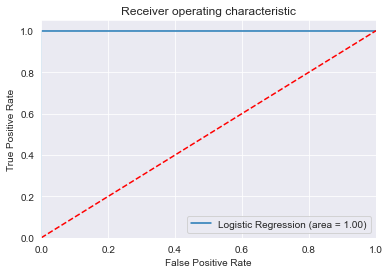

In [67]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [69]:
#saving model results here
results_dict={}
results_dict['logreg']=getresults(y_pred)

In [70]:
results_dict

{'logreg': ('F1:', 0.9981167608286252, 'Accuracy:', 0.9981538461538462)}

In [72]:
#Decision Tree

dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_pred_train=dtc.predict(X_train)
y_pred_test_tree=dtc.predict(X_test)

In [75]:
print("Acc Score:",metrics.accuracy_score(y_train, y_pred_train))
print("Acc Score:",metrics.accuracy_score(y_test, y_pred_test_tree))

Acc Score: 1.0
Acc Score: 1.0


In [76]:
getresults(y_pred_test_tree)

('F1:', 1.0, 'Accuracy:', 1.0)

In [77]:
results_dict['Decision Tree']=getresults(y_pred_test_tree)

In [78]:

results_dict

{'logreg': ('F1:', 0.9981167608286252, 'Accuracy:', 0.9981538461538462),
 'Decision Tree': ('F1:', 1.0, 'Accuracy:', 1.0)}